## Coorelation between Renewable & Non Renewable Energy Stocks?

     - This Analysis is to find the coorelation between stocks.
     - Analysed OIL, SOLAR, WIND company stock.
     - Analysed risk of the stock using VaR(Value at Risk).
     - Predicted the Risk Percantage using Empirical Quantile Formula.

#### Imported all required Packages 
    - Pandas
    - Numpy
    - Matplotlib
    - Seaborn
    - OS

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Offsetting the warning
import warnings
warnings.filterwarnings('ignore')
import numpy as np

#### Data Processing
    - Read all required CSV file using pandas.
    - created seperate dataframes for seperate CSV.
    - As CSV contains dates so I parsed it while reading using parse_dates.

In [3]:
# Getting Current Working Directory
cwd = os.getcwd()

# Reading all required CSV's
cvx = pd.read_csv(cwd+"//final//data//stockData//CVX.csv", parse_dates=['Date'])
fslr = pd.read_csv(cwd+"//final//data//stockData//FSLR.csv", parse_dates=['Date'])
vws = pd.read_csv(cwd+"//final//extra//VWS.csv", parse_dates=['Date'])
vws['company_code'] = 'VWS'

#### Merging CSV
    - Task is to merge all csv outerly on Date Column
    - Saving the final CSV in Analysis 3 Folder for final Analysis.

In [4]:
# Merging all csv's togeather
mergeS = pd.merge(cvx, fslr, how='outer', on='Date')
df = pd.merge(mergeS, vws, how='outer', on='Date')
df.to_csv(cwd+"//final//extra//stock.csv", index=False)

#### Removing extra rows.
    - As we know 2017 is running and I don't have enough Data to represent so I removed all Data for 2017.
    - I done the cleaning using drop NAN values.

In [5]:
df = pd.read_csv(cwd+"//final//extra//stock.csv", parse_dates=['Date'])
df = df.sort(['Date'], ascending=[1])
df = df[df.Date.dt.year != 2017]
df = df.dropna()

#### created function in order to save data in required directories

In [6]:
#function to check is directory exists
def funCheckDir(path):
    directory = os.path.dirname(path) # defining directory path
    if not os.path.exists(directory): # checking if directory already exists
        os.makedirs(directory) # making a directory

In [7]:
resultsPath = cwd+'\\final\\analysis\\ana_[1-3]//Analysis 3//stock.csv'
funCheckDir(resultsPath)

# Saving CSV for Analysis
df.to_csv(resultsPath, index=False)

#### This how the data from merge CSV looks like.
    - THE FOLLOWING COLUMNS ARE-
        - OPEN - is the price of the stock at the beginning of the trading day (it need not be the closing price of the previous trading day),
        - HIGH - is the highest price of the stock on that trading day
        - LOW - the lowest price of the stock on that trading day, and close the price of the stock at closing time.
        - VOLUME - indicates how many stocks were traded. 
        - ADJ CLOSE - is the closing price of the stock that adjusts the price of the stock for corporate actions.

In [8]:
df = pd.read_csv(cwd+'\\final\\analysis\\ana_[1-3]//Analysis 3//stock.csv', parse_dates=['Date'])
df = df.sort(['Date'], ascending=[1])
df.head(1)

,Date,company_code_x,Open_x,High_x,Low_x,Close_x,Volume_x,Ex-Dividend_x,Split Ratio_x,Adj. Open_x,...,Adj. Low_y,Adj. Close_y,Adj. Volume_y,Open,High,Low,Close,Volume,Adj Close,company_code
0,2012-01-03,CVX,108.74,110.99,108.73,110.37,11518700.0,0.0,1.0,89.228418,...,34.7601,35.79,4438700.0,69.45,69.9,68.05,69.6,2605900.0,66.52,VWS


#### Here I am considering ADj CLOSE COLUMN as a parameter for analysis.
    - WHY ADJ CLOSE?
        - Beacuse it is the closing price of the stock that adjusts the price of the stock for corporate actions.
    - Creating New Data Frame by taking ADJ Close of all Companies.
    - Merging on the basis of Date.

In [9]:
columns = ['Date', 'CVX', 'FSLR', 'VWS']
dfAdjClose = pd.DataFrame({'Date' : df.Date, 'CVX' : df['Adj. Close_x'], 'FSLR' : df['Adj. Close_y'],
                           'VWS' : df['Adj Close']})
dfDateIndex = dfAdjClose.set_index('Date')
dfDateIndex.head()

,CVX,FSLR,VWS
Date,,,
2012-01-03,90.565942,35.79,66.52
2012-01-04,90.410034,34.70,53.76
2012-01-05,89.523822,35.48,52.57
2012-01-06,88.875574,35.27,53.67
2012-01-09,89.843843,36.84,55.68


#### Now Finding a Percentage Change of each company stock with related to past dates.
    - USED PCT_CHANGE function from pandas.

In [10]:
stockChange = dfDateIndex.pct_change()
stockChange.head()

,CVX,FSLR,VWS
Date,,,
2012-01-03,NaN,NaN,NaN
2012-01-04,-0.001721,-0.030455,-0.191822
2012-01-05,-0.009802,0.022478,-0.022135
2012-01-06,-0.007241,-0.005919,0.020924
2012-01-09,0.010895,0.044514,0.037451


### Now we can compare the daily percentage return of stocks to check how they are correlated to eachother.



#### COORELATION BETWEEN OIL & SOLAR.

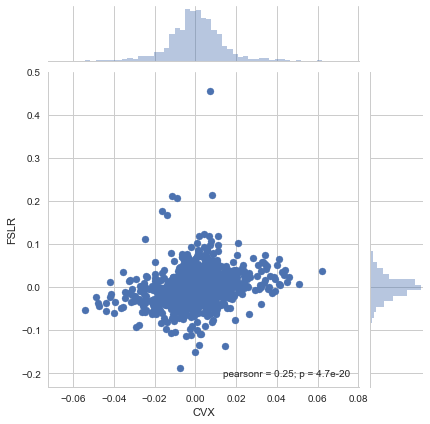

In [41]:
# Use joinplot to compare the daily returns of CVX and FSLR
sns.jointplot('CVX','FSLR',stockChange,kind='scatter')

# Saving Joint Plot Map in Analysis 3 Folder    
oilVSSolar = cwd+'\\final\\analysis\\ana_[1-3]//Analysis 3//oilVSSolar.png'
funCheckDir(oilVSSolar)

plt.savefig(oilVSSolar)

#### COORELATION BETWEEN Solar & WIND.

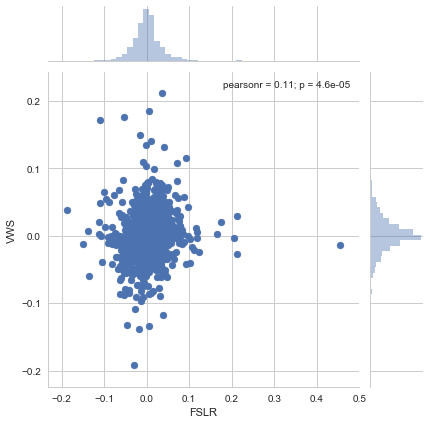

In [42]:
sns.jointplot('FSLR','VWS',stockChange,kind='scatter')

# Saving Joint Plot Map in Analysis 3 Folder    
solarVSwind = cwd+'\\final\\analysis\\ana_[1-3]//Analysis 3//solarVSwind.png'
funCheckDir(solarVSwind)

plt.savefig(solarVSwind)

#### COORELATION BETWEEN WIND & OIL.

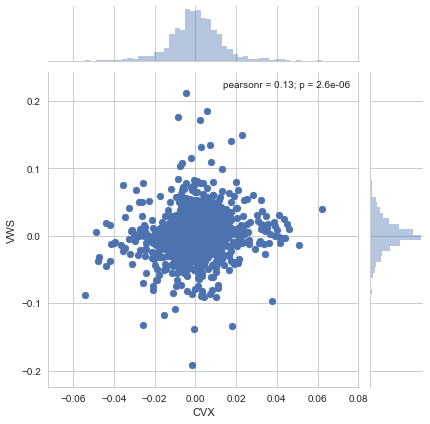

In [43]:
sns.jointplot('CVX','VWS',stockChange,kind='scatter')

# Saving Joint Plot Map in Analysis 3 Folder    
windVSoil = cwd+'\\final\\analysis\\ana_[1-3]//Analysis 3//windVSoil.png'
funCheckDir(windVSoil)

plt.savefig(windVSoil)

### RESULT FROM ALL  COORELATIONS

    - The correlation coefficient B/w OIL & SOLAR is 0.25.
    - The correlation coefficient B/w SOLAR & WIND  is 0.11.
    - The correlation coefficient B/w WIND & OIL is 0.13.
    
### NOTE- AS The coorealtion coefficient is not a lot but after analysing above cooefiicients.
    - I can say OIL & SOLAR have some coorelation between them.

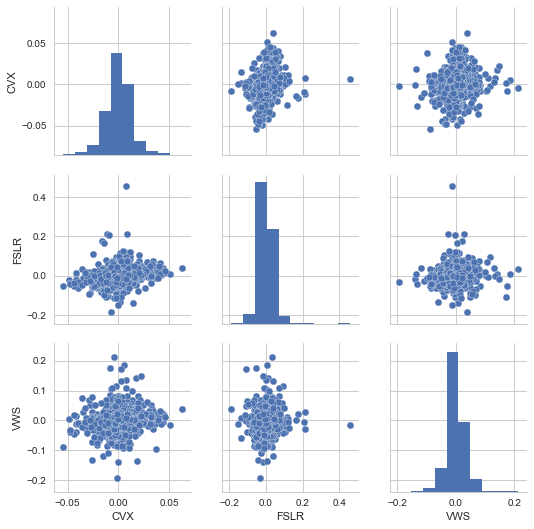

In [33]:
# Call pairplot for an automatic visual analysis of all the comparisons
pairPlot = sns.pairplot(stockChange.dropna())


# Saving Pair Plot Map in Analysis 3 Folder    
pairplot = cwd+'\\final\\analysis\\ana_[1-3]//Analysis 3//PairPlot.png'
funCheckDir(pairplot)
pairPlot.savefig(pairplot)

#### From Above We can say,
- A quick glance shows positive correlation between CVX and FSLR daily returns are rather high.


#### NOW, will draw a correlation plot with actual numerical values for the correlation between the stocks' daily return values.

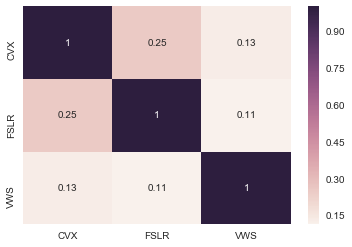

In [30]:
fig, ax = plt.subplots()
ax = sns.heatmap(stockChange.dropna().corr(),annot=True)



# Saving HEat Map in Analysis 3 Folder    
heatMapPng = cwd+'\\final\\analysis\\ana_[1-3]//Analysis 3//heatMapCoorelation.png'
funCheckDir(heatMapPng)
fig.savefig(heatMapPng)

#### Result from above coorealtion plot.
- Just like we suspected in our C0orelation Plot, we see here that CVX and FSLR had the strongest correlation of daily stock return. 


#### Next step is for actual risk analysis.
    - One of the most basic ways to quantify risk was to compare the expected return with the standard deviation of the daily returns.
    - Calculated Mean & Standard Deviation.

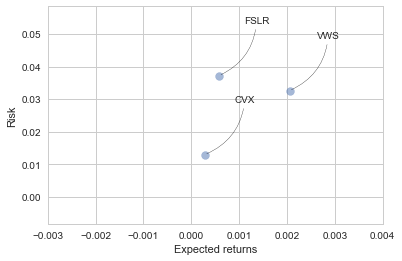

In [28]:
riskA = stockChange.dropna()
area = np.pi*20
plt.scatter(riskA.mean(), riskA.std(),alpha = 0.5,s =area)
plt.xlim([-0.003,0.004])
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# label
for label, x, y in zip(riskA.columns, riskA.mean(), riskA.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))
    
    
# Saving Risk PNG in Analysis 3 Folder    
riskPng = cwd+'\\final\\analysis\\ana_[1-3]//Analysis 3//RiskVSReturns.png'
funCheckDir(riskPng)
    
plt.savefig(riskPng)

### From above Result-:
- It seems that VWS(WIND) is the best choice.
- If we can only choose 1 stock. As it has the highest expected returns and lowest risk.


#### Next, we find the Risk using Empirical Quantile .
- What is Empirical Quantile?
    - In statistics and the theory of probability, quantiles are cutpoints dividing the range of a probability distribution into contiguous intervals with equal probabilities, or dividing the observations in a sample in the same way. There is one less quantile than the number of groups created.

In [25]:
# The 0.05 empirical quantile of daily returns
rets['VWS'].quantile(0.05)

-0.04808464459503056

#### Result from above
- It means that with 90% confidence, our worst daily loss for VWS will not exceed by 4.5%.

## Final Conclusion
- There is a coorelation between OIL & SOLAR.
- VWS is the best choice to buy.
- Daily Risk for VWS Stock will not increase 4.5 %.
- Buying 1 Stock has highest expected returns & Lowest Risks.